# DBScan
Density-Based Spatial Clustering of Applications with Noise

Algorítimo não supervisionado destinado a Clusterização e identificação de Outliers

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

%matplotlib inline

## Dados
- EPS: distância máxima entre 2 amostras para formar um cluster de mesmo tipo (neighborhood).
- minPts: É o número minimo de uma amostra em uma vizinhança para uma amostra ser classificada como "Core Point"
- Core Point: um pouco acima que os minPts na EPS.
- Border Point: um pouco abaixo que os minPts na EPS.
- Noise (Outlier): não é um Core ou Border.

In [2]:
X, label = make_moons(n_samples=200, noise=0.1)
X[0:5]

array([[ 0.86511607,  0.36807078],
       [ 0.6650271 ,  0.81336061],
       [ 2.13659893,  0.38425212],
       [ 0.82925868, -0.52224206],
       [ 0.47899281, -0.22492106]])

In [3]:
print(label)

[0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0
 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0
 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1]


In [4]:
model = DBSCAN(eps=0.25, min_samples=10)
model.fit(X)

DBSCAN(eps=0.25, min_samples=10)

In [5]:
print(model.labels_)

[ 0  0  1  1  1  1  1  0  1  0  1  0  1  1  0  0  1  1  1  1  1  1  0  1
  0  1  1  0  1  0  0  1  0  1  1  0  0  1  0  1  1  0  0  1  0  0  1  1
  1  1  0  1  0  1  0  1  0  1  0  0  1  1  0  1  0  0  1  0  0  0  1  0
  0  0  0  0  0  1  0  1  0  0  1  1  1  1  0  1  1  0  1  1  0  1  0  1
  1  0  1  0  1  0  1 -1  0  1  0  0  0  0  0  0  1  0  0  1  0  0  1  1
  0  1  0  0  0  0  0  0  1  0  1  0  1  0  1  0  1  1  1  0  1  0  0  1
  0  1  1  0  0  1  0  0  0  0  1  1  1  0  1  0  1  1  1  0  0  1  1  1
  0  1  0  0  0  1  0  1  0  1  1  0  1  1  0  0  0  0  0  0  1  1  1  0
  1  1  0  1  0  1  1  1]


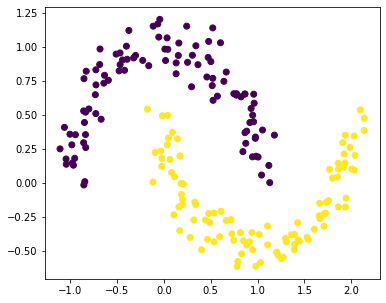

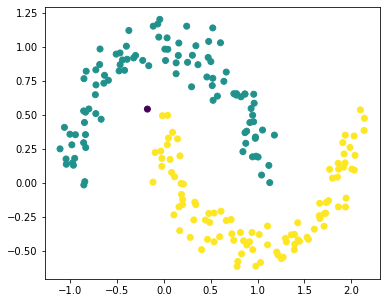

In [6]:
# Original
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(X[:,0], X[:,1], c=label)
fig.show()

# Predito
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(X[:,0], X[:,1], c=model.labels_)
fig.show()

## Identificando Outliers

### Treinar o modelo

In [7]:
iris = datasets.load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                 columns=iris['feature_names'] + ['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
model = DBSCAN(eps = 0.8, min_samples=19).fit(df)
print(model)

DBSCAN(eps=0.8, min_samples=19)


### Visualizar o resultado

In [11]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  2,  2,
        2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [9]:
df[model.labels_==-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
98,5.1,2.5,3.0,1.1,1.0
105,7.6,3.0,6.6,2.1,2.0
106,4.9,2.5,4.5,1.7,2.0
117,7.7,3.8,6.7,2.2,2.0
118,7.7,2.6,6.9,2.3,2.0
122,7.7,2.8,6.7,2.0,2.0
131,7.9,3.8,6.4,2.0,2.0


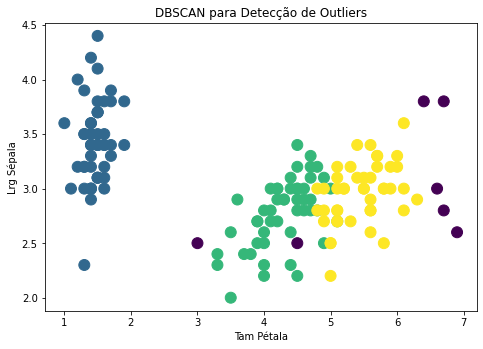

In [10]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_
ax.scatter(df.iloc[:,2], df.iloc[:,1], c=colors, s=120)
ax.set_xlabel('Tam Pétala')
ax.set_ylabel('Lrg Sépala')
plt.title('DBSCAN para Detecção de Outliers')
plt.show()